In [13]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

In [14]:
## 한글설정
path = 'C:/Users/jaemi/AppData/Local/Microsoft/Windows/Fonts/NanumGothicCoding.ttf'

font_name = fm.FontProperties(fname= path).get_name()
rc('font', family = font_name)

In [15]:
## 여자의 나이에 따른 출산 나이
df_fe = pd.read_excel('./모의_연령_5세계급__모의_교육정도별_출생_20230515174731.xlsx', )
df_fe.head(10)

c:\Users\jaemi\anaconda3\envs\pandas_jm\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도별,모의 연령(5세계급)별,교육정도별,2015,2016,2017,2018,2019,2020,2021
0,전국,계,총계,438420,406243,357771,326822,302676,272337,260562
1,NaN,NaN,무학,237,153,149,244,238,281,205
2,NaN,NaN,초등학교,1075,924,811,607,644,551,434
3,NaN,NaN,중고등학교,102147,90332,76165,65569,58735,51110,44836
4,NaN,NaN,중학교,6031,5559,4806,4187,3964,3404,2834
5,NaN,NaN,고등학교,96116,84773,71359,61382,54771,47706,42002
6,NaN,NaN,초대.전문대이상,332582,311005,276099,255070,237054,213601,208489
7,NaN,NaN,대학(교),299306,279666,247470,228164,211580,190368,185278
8,NaN,NaN,대학원 이상,33276,31339,28629,26906,25474,23233,23211
9,NaN,NaN,미상,2379,3829,4547,5332,6005,6794,6598


In [121]:
## 남자의 나이에 따른 출산 나이
df_ma = pd.read_excel('./부의_연령_부의_교육정도별_출생_20230515171225.xlsx', )
df_ma.head(50)

c:\Users\jaemi\anaconda3\envs\pandas_jm\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도별,부의 연령(5세계급)별,교육정도별,2015,2016,2017,2018,2019,2020,2021
0,전국,계,총계,438420,406243,357771,326822,302676,272337,260562
1,NaN,NaN,무학,173,151,141,148,149,168,99
2,NaN,NaN,초등학교,818,667,616,431,410,320,295
3,NaN,NaN,중고등학교,104856,95256,82590,70773,64558,57801,52270
4,NaN,NaN,중학교,4749,4312,3722,3129,2852,2603,2162
5,NaN,NaN,고등학교,100107,90944,78868,67644,61706,55198,50108
6,NaN,NaN,초대.전문대이상,326530,303107,267425,247503,229125,205152,199359
7,NaN,NaN,대학(교),285180,264772,232998,215377,199507,178338,172570
8,NaN,NaN,대학원 이상,41350,38335,34427,32126,29618,26814,26789
9,NaN,NaN,미상,6043,7062,6999,7967,8434,8896,8539


In [130]:
# 전체 여자의 계 계산
total_female = df_fe.iloc[0, 3:]
print('여자 전체 결혼\n', total_female)
print()
# 20대 여자의 데이터 추출
data_20_female = df_fe.iloc[30, 3:] + df_fe.iloc[40, 3:]
print('20대 여자\n', data_20_female)
print()
# 30대 여자의 데이터 추출
data_30_female = df_fe.iloc[50, 3:] + df_fe.iloc[60, 3:]
print('30대 여자\n', data_30_female)
print()
# 40대 여자의 데이터 추출
data_40_female = df_fe.iloc[70, 3:] + df_fe.iloc[80, 3:]
print('40대 여자\n', data_40_female)
print()


여자 전체 결혼
 2015    438420
2016    406243
2017    357771
2018    326822
2019    302676
2020    272337
2021    260562
Name: 0, dtype: object

20대 여자
 2015    115136
2016    104114
2017     89794
2018     78342
2019     69137
2020     60243
2021     53380
dtype: object

30대 여자
 2015    308333
2016    287281
2017    253690
2018    234168
2019    218634
2020    197224
2021    191528
dtype: object

40대 여자
 2015    12473
2016    12707
2017    12575
2018    12806
2019    13640
2020    13822
2021    15032
dtype: object



In [131]:
# 20대 여자의 비율 계산
ratio_20_female = data_20_female / total_female * 100
print('20대 여자의 비율 계산\n', ratio_20_female)

# 30대 여자의 비율 계산
ratio_30_female = data_30_female / total_female * 100
print('30대 여자의 비율 계산\n', ratio_30_female)

# 40대 여자의 비율 계산
ratio_40_female = data_40_female / total_female * 100
print('40대 여자의 비율 계산\n', ratio_40_female)

20대 여자의 비율 계산
 2015    26.261576
2016    25.628503
2017    25.098177
2018    23.970847
2019    22.841917
2020    22.120755
2021    20.486487
dtype: object
30대 여자의 비율 계산
 2015    70.328224
2016    70.716542
2017    70.908486
2018    71.650011
2019    72.233676
2020    72.419098
2021     73.50573
dtype: object
40대 여자의 비율 계산
 2015    2.844989
2016    3.127931
2017    3.514818
2018    3.918341
2019    4.506469
2020    5.075329
2021    5.769068
dtype: object


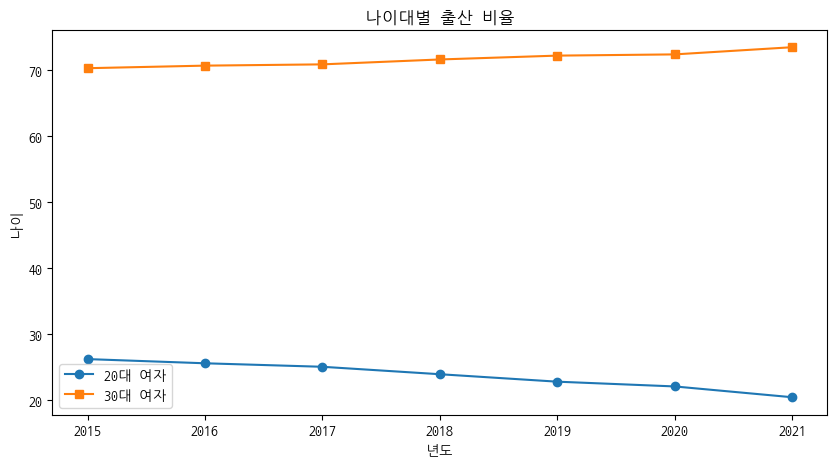

In [43]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 20대 여자 비율 그래프 그리기
plt.plot(ratio_20_female, marker='o', label='20대 여자')

# # 30~34세 여자 비율 그래프 그리기
plt.plot(ratio_30_female, marker='s', label='30대 여자')

# 그래프 타이틀과 레이블 설정
plt.title('나이대별 출산 비율')
plt.xlabel('년도')
plt.ylabel('나이')
plt.legend()

# 그래프 출력
plt.show()

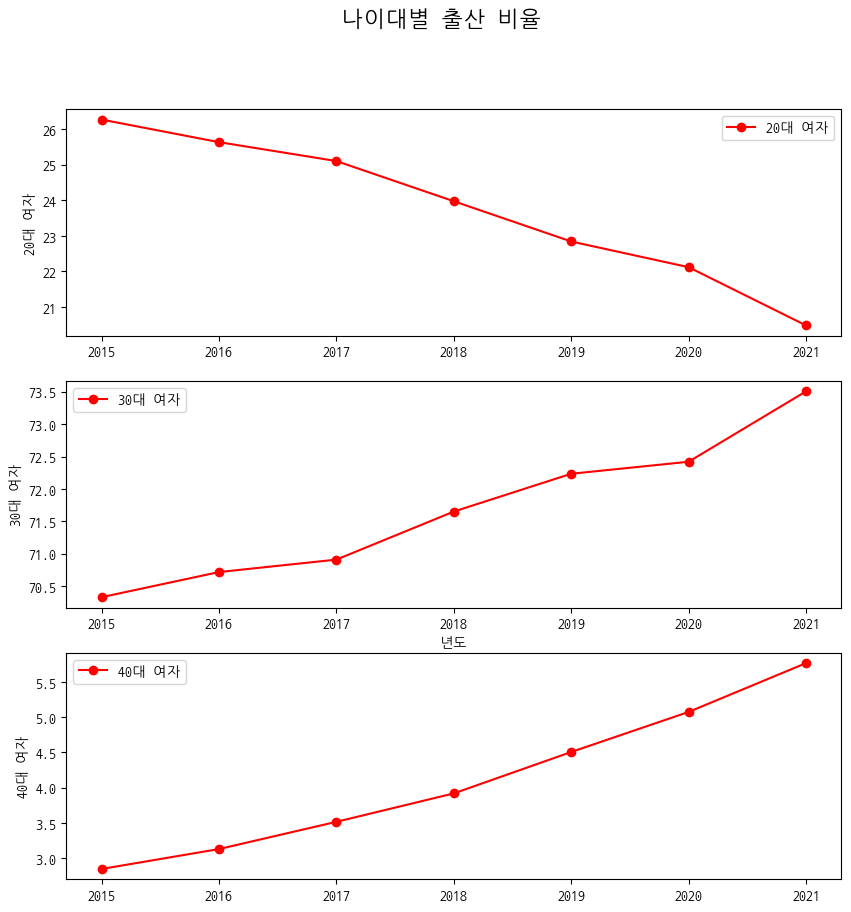

In [132]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# 20대 여자 비율 그래프 그리기
ax[0].plot(ratio_20_female, 'ro-', label='20대 여자')

# 30대 여자 비율 그래프 그리기
ax[1].plot(ratio_30_female, 'ro-', label='30대 여자')

# 40대 여자 비율 그래프 그리기
ax[2].plot(ratio_40_female, 'ro-', label='40대 여자')

# 그래프 타이틀과 레이블 설정
fig.suptitle('나이대별 출산 비율', fontsize=16)
ax[1].set_xlabel('년도')
ax[0].set_ylabel('20대 여자')
ax[1].set_ylabel('30대 여자')
ax[2].set_ylabel('40대 여자')
ax[0].legend()
ax[1].legend()
ax[2].legend()

# 그래프 출력
plt.show()


In [127]:
# 전체 남자의 계 계산
total_male = df_ma.iloc[0, 3:]
print('남자 전체 결혼\n', total_male)
print()
# 20대 남자의 데이터 추출
data_20_male = df_ma.iloc[30, 3:] + df_ma.iloc[40, 3:]
print('20대 남자\n', data_20_male)
print()
# 30대 남자의 데이터 추출
data_30_male = df_ma.iloc[50, 3:] + df_ma.iloc[60, 3:]
print('30대 남자\n', data_30_male)
print()
# 40대 남자의 데이터 추출
data_40_male = df_ma.iloc[70, 3:] + df_ma.iloc[80, 3:]
print('40대 남자\n', data_40_male)
print()

남자 전체 결혼
 2015    438420
2016    406243
2017    357771
2018    326822
2019    302676
2020    272337
2021    260562
Name: 0, dtype: object

20대 남자
 2015    51939
2016    47085
2017    40533
2018    35562
2019    31387
2020    27383
2021    24514
dtype: object

30대 남자
 2015    328478
2016    303017
2017    264303
2018    240333
2019    220400
2020    196085
2021    187092
dtype: object

40대 남자
 2015    51258
2016    49767
2017    47117
2018    45350
2019    45340
2020    43658
2021    44078
dtype: object



In [128]:
# 20대 남자의 비율 계산
ratio_20_male = data_20_male / total_male * 100
print('20대 남자의 비율 계산\n', ratio_20_male)

# 30대 남자의 비율 계산
ratio_30_male = data_30_male / total_male * 100
print('30대 남자의 비율 계산\n', ratio_30_male)

# 40대 남자의 비율 계산
ratio_40_male = data_40_male / total_male * 100
print('40대 남자의 비율 계산\n', ratio_40_male)

20대 남자의 비율 계산
 2015    11.846859
2016    11.590354
2017    11.329314
2018    10.881152
2019    10.369834
2020    10.054822
2021     9.408126
dtype: object
30대 남자의 비율 계산
 2015    74.923133
2016    74.590085
2017    73.874909
2018    73.536359
2019    72.817138
2020    72.000867
2021    71.803256
dtype: object
40대 남자의 비율 계산
 2015    11.691529
2016     12.25055
2017    13.169597
2018    13.876055
2019    14.979714
2020    16.030874
2021    16.916511
dtype: object


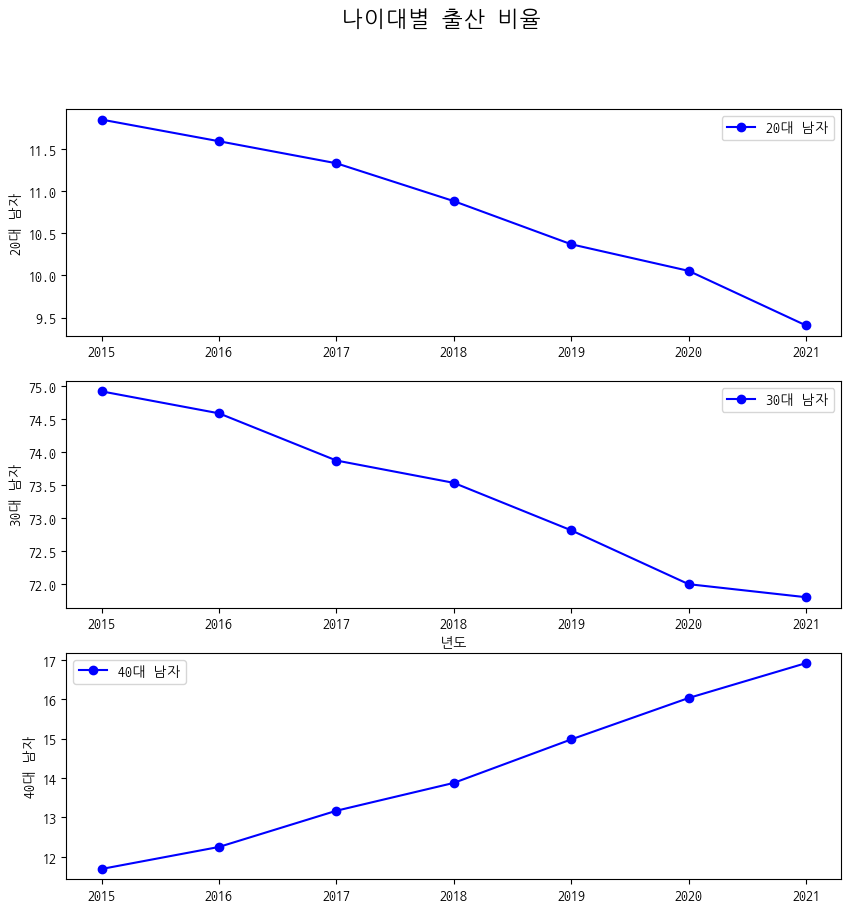

In [129]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# 20대 남자 비율 그래프 그리기
ax[0].plot(ratio_20_male, 'bo-', label='20대 남자')

# 30대 남자 비율 그래프 그리기
ax[1].plot(ratio_30_male, 'bo-', label='30대 남자')

# 40대 남자 비율 그래프 그리기
ax[2].plot(ratio_40_male, 'bo-', label='40대 남자')

# 그래프 타이틀과 레이블 설정
fig.suptitle('나이대별 출산 비율', fontsize=16)
ax[1].set_xlabel('년도')
ax[0].set_ylabel('20대 남자')
ax[1].set_ylabel('30대 남자')
ax[2].set_ylabel('40대 남자')
ax[0].legend()
ax[1].legend()
ax[2].legend()

# 그래프 출력
plt.show()

In [116]:
df1 = pd.read_excel('./전국_연령별_장애유형별_성별_등록장애인수_20230515033734.xlsx')
df2 = pd.read_excel('./전국_연령별_장애유형별_성별_등록장애인수_20230515034348.xlsx')
df3 = pd.read_excel('./전국_연령별_장애유형별_성별_등록장애인수_20230515034425.xlsx')

# df1.head(10)
# df2.head(10)
df3.head(10)

,연령별(1),연령별(2),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,...,2018.38,2018.39,2018.40,2018.41,2018.42,2018.43,2018.44,2018.45,2018.46,2018.47
0,연령별(1),연령별(2),합계,합계,합계,지체,지체,지체,시각,시각,...,간,안면,안면,안면,장루ㆍ요루,장루ㆍ요루,장루ㆍ요루,뇌전증,뇌전증,뇌전증
1,연령별(1),연령별(2),계,남자,여자,계,남자,여자,계,남자,...,여자,계,남자,여자,계,남자,여자,계,남자,여자
2,합계,소계,2545637,1475550,1070087,1254130,725384,528746,252632,150364,...,3599,2689,1561,1128,15027,9291,5736,7021,3817,3204
3,0-4세,소계,5673,3380,2293,270,151,119,203,108,...,36,2,0,2,11,4,7,19,8,11
4,NaN,0세,46,34,12,5,5,0,7,6,...,0,0,0,0,0,0,0,0,0,0
5,NaN,1세,517,287,230,36,20,16,27,13,...,3,1,0,1,0,0,0,2,0,2
6,NaN,2세,1157,649,508,65,39,26,50,23,...,10,0,0,0,4,2,2,4,2,2
7,NaN,3세,1640,970,670,69,39,30,66,34,...,11,1,0,1,5,1,4,6,3,3
8,NaN,4세,2313,1440,873,95,48,47,53,32,...,12,0,0,0,2,1,1,7,3,4
9,5-9세,소계,21583,14616,6967,635,370,265,549,319,...,70,3,1,2,21,11,10,46,29,17


In [110]:
dorp_df1 = df1.iloc[:20, :]
dorp_df2 = df2.iloc[:20, :]
dorp_df3 = df3.iloc[:20, :]
print(dorp_df3)

    연령별(1)  연령별(2)     2017   2017.1   2017.2   2017.3  2017.4  2017.5   
0   연령별(1)  연령별(2)       합계       합계       합계       지체      지체      지체  \
1   연령별(1)  연령별(2)        계       남자       여자        계      남자      여자   
2       합계      소계  2545637  1475550  1070087  1254130  725384  528746   
3     0-4세      소계     5673     3380     2293      270     151     119   
4      NaN      0세       46       34       12        5       5       0   
5      NaN      1세      517      287      230       36      20      16   
6      NaN      2세     1157      649      508       65      39      26   
7      NaN      3세     1640      970      670       69      39      30   
8      NaN      4세     2313     1440      873       95      48      47   
9     5-9세      소계    21583    14616     6967      635     370     265   
10     NaN      5세     3310     2189     1121      103      63      40   
11     NaN      6세     4637     3176     1461      114      55      59   
12     NaN      7세     4835     3307  

In [112]:
df1_loc = dorp_df1.iloc[3::6, 2]
df2_loc = dorp_df2.iloc[3::6, 2]
df3_loc = dorp_df3.iloc[3::6, 2]


# print(df1_loc)
# print(df2_loc)
print(df3_loc)

3      5673
9     21583
15    24178
Name: 2017, dtype: object


In [113]:
df3_sum = df3_loc.sum()
print(df3_sum)

51434


In [133]:
df = pd.concat([df3_loc, df2_loc, df1_loc], axis=1)
print(df.head())

     2017   2019   2021
3    5673   6159   5571
9   21583  24961  26733
15  24178  24925  28866
21    NaN  34723  30818
27    NaN  47397  46090
